# **Analyze and Pre-Process Data Coming from a Recommender System**

---

In [1]:
import os
import zipfile
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns


## **Dataset Download**

In [2]:
if os.path.exists("data"):
    print("Data directory already exists, skipping creating the directory.")
else:
    os.makedirs("data", exist_ok=True)
    print("Downloading data...")

Data directory already exists, skipping creating the directory.


In [3]:
DATA_DIR = Path("data")

In [4]:
DATASETS_NAME = "hetrec2011-movielens-2k-v2"
DATASETS_URL = "https://files.grouplens.org/datasets/hetrec2011/{name}.zip"


In [5]:
def download_dataset(url: str, filename: str):
    """Download a dataset from a URL and save it to the data directory.

    Args:
        url (str): The URL to download the dataset from.
        filename (str): The filename to save the dataset as.

    Returns:
        str: The filename the dataset was saved as.
    """
    response = requests.get(url)
    response.raise_for_status()
    with open(DATA_DIR / filename, "wb") as file:
        file.write(response.content)
    print(f"Downloaded {filename} from {url}.")
    return filename

In [6]:
if not (DATA_DIR / f"{DATASETS_NAME}.zip").exists():
    download_dataset(URLS.format(name=DATASETS_NAME), f"{DATASETS_NAME}.zip")
else:
    print(f"Dataset {DATASETS_NAME} already exists, skipping download.")

Dataset hetrec2011-movielens-2k-v2 already exists, skipping download.


In [7]:
def unzip_file(file_path: Path):
    """Unzip a file to the data directory.

    Args:
        file_path (Path): The path to the file to unzip.

    Returns:
        str: The path to the unzipped directory.
    """
    with zipfile.ZipFile(file_path, "r") as zip_ref:
        zip_ref.extractall(DATA_DIR / file_path.stem)
    print(f"Unzipped {file_path}.")
    return file_path.stem

In [8]:
if not (DATA_DIR / DATASETS_NAME).exists():
    unzip_file(DATA_DIR / f"{DATASETS_NAME}.zip")
else:
    print(f"Dataset {DATASETS_NAME} already unzipped, skipping unzip.")

Dataset hetrec2011-movielens-2k-v2 already unzipped, skipping unzip.


## **Dataset Explanation**

In [9]:
user_rated_movies = pd.read_csv(
    DATA_DIR / DATASETS_NAME / "user_ratedmovies-timestamps.dat", sep="\t", encoding="utf-8"
)
user_rated_movies.head(n=5)

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000


In [10]:
user_rated_movies.describe().round(2)

,userID,movieID,rating,timestamp
count,855598.00,855598.00,855598.00,8.555980e+05
mean,35190.83,8710.18,3.44,1.130530e+12
std,20385.00,14446.85,1.00,7.178767e+10
min,75.00,1.00,0.50,8.745324e+11
25%,18161.00,1367.00,3.00,1.092553e+12
50%,33866.00,3249.00,3.50,1.144843e+12
75%,52004.00,6534.00,4.00,1.184265e+12
max,71534.00,65133.00,5.00,1.231130e+12


In [11]:
print("Rating column statistics:")
user_rated_movies.describe().round(2)["rating"]

Rating column statistics:


count    855598.00
mean          3.44
std           1.00
min           0.50
25%           3.00
50%           3.50
75%           4.00
max           5.00
Name: rating, dtype: float64

In [12]:
print("Top 5 most rated movies:")
user_rated_movies["movieID"].value_counts().nlargest(n=5)

Top 5 most rated movies:


movieID
2571    1670
4993    1576
356     1568
296     1537
5952    1528
Name: count, dtype: int64

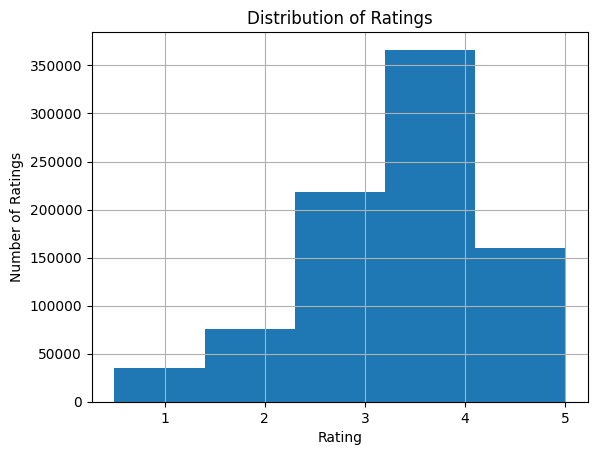

In [13]:
user_rated_movies.rating.hist(bins=5)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()

In [14]:
number_of_ratings = user_rated_movies.rating.count()
total_number_of_users = user_rated_movies.userID.nunique()
total_number_of_movies = user_rated_movies.movieID.nunique()

print(f"Number of ratings: {number_of_ratings}")
print(f"Number of unique users: {total_number_of_users}")
print(f"Number of unique movies: {total_number_of_movies}")


Number of ratings: 855598
Number of unique users: 2113
Number of unique movies: 10109


In [15]:
print(f"If each user rated each movie once, there would be {total_number_of_users * total_number_of_movies} ratings.")

If each user rated each movie once, there would be 21360317 ratings.


In [16]:
density = number_of_ratings / (total_number_of_users * total_number_of_movies)
print(f"Density of the ratings: {density:.2%}")
sparsity = 1 - density
print(f"Sparsity of the ratings: {sparsity:.2%}")

Density of the ratings: 4.01%
Sparsity of the ratings: 95.99%


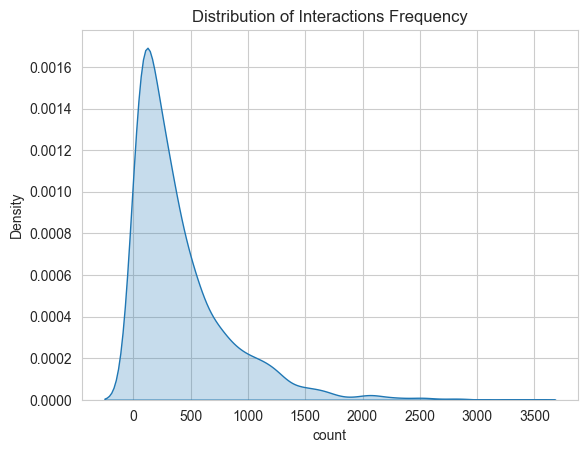

In [17]:
sns.set_style("whitegrid")
plt.title("Distribution of Interactions Frequency")
interaction_frequency = user_rated_movies.userID.value_counts()
sorted_interaction_frequency = interaction_frequency.sort_values(ascending=False)
sns.kdeplot(sorted_interaction_frequency, fill=True, label="Interactions")
plt.show()